## Método de MonteCarlo: Ejercicio 8

<IPython.core.display.Javascript object>


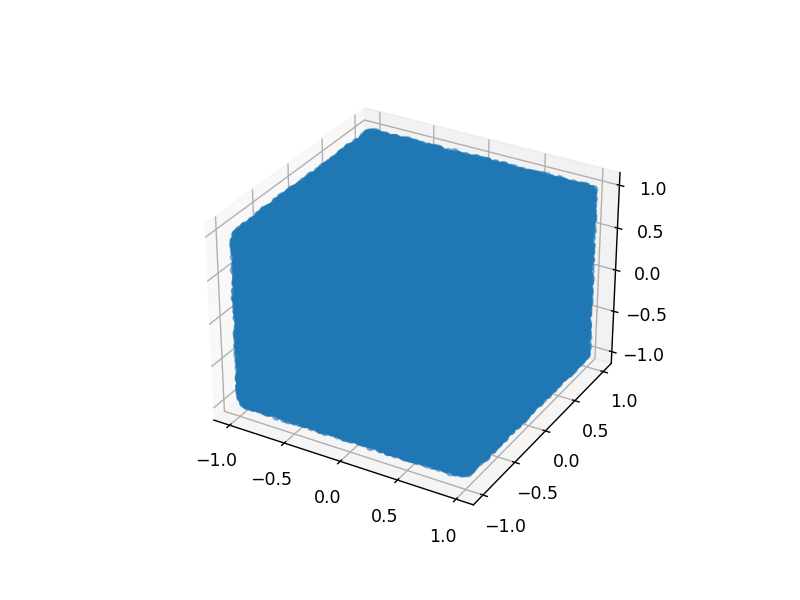

In [43]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook
N = int(1e6)
# Valores de los límites del rectángulo donde estarán los puntos
xmin = -1
xmax = 1
ymin = -1
ymax = 1
zmin = -1
zmax = 1 
#Valor del volumen del rectángulo
V_total = (xmax-xmin)*(ymax-ymin)*(zmax - zmin) 

#Inicialización de los puntos random
x = np.random.rand(N)*(xmax - xmin) + xmin
y = np.random.rand(N)*(ymax - ymin) + ymin
z = np.random.rand(N)*(zmax - zmin) + zmin
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.scatter3D(x,y,z,alpha=0.5)

In [44]:
import tqdm as tqdm
def CreateSphere(N,R=1):
    
    Points = np.zeros((N,3))
        
    for i in range(N):
        
        phi = np.random.uniform(0,2*np.pi)
        u = np.random.rand()
        r = R*u**(1/3)
        costheta = np.random.uniform(-1,1)
        theta = np.arccos(costheta)
        
        Points[i] = [r*np.cos(phi)*np.sin(theta),r*np.sin(phi)*np.sin(theta),r*np.cos(theta)]
        
    return Points
Sphere = CreateSphere(N)
x = Sphere[:,0]
y = Sphere[:,1]
z = Sphere[:,2]

I_diag = np.zeros(3)

sum1= 0
sum2 = 0
sum3= 0
    
sum_xy = 0
for i in range(N):
    sum1 += y[i]**2 + z[i]**2
I_diag[0] = (1/N)*sum1

for i in range(N):
    sum2 += x[i]**2 + z[i]**2
I_diag[1] = (1/N)*sum2

for i in range(N):
    sum3 += x[i]**2 + y[i]**2
I_diag[2] = (1/N)*sum3


print("I_xx: %s, I_yy: %s, I_zz : %s"%(I_diag[0],I_diag[1],I_diag[2]))

I_xx: 0.399596052086051, I_yy: 0.40027843389473033, I_zz : 0.3999554019430597


In [46]:
sum_xy = 0
for i in range(N):
    sum_xy += x[i]*y[i]

I_xy = -(1/N)*sum_xy
I_xy

0.0002527281038212022

¿Qué puede concluir sobre la simetría de rotación de la esfera?

El hecho de que únicamente la diagonal del tensor de momentos de inercia es la única no nula, significa que la distribución de la masa del objeto es simétrica con respecto al punto de referencia tomado (en este caso el origen). Es decir, es invariante bajo rotaciones.

## Ejercicio 22: Integración

La parte teórica está hecha como un archivo jpeg en el repositorio parcial 2

In [50]:
import numpy as np
import matplotlib.pyplot as plt
a = 0.5
Roots,Weight=np.polynomial.laguerre.laggauss(20)
x_in = 0
x_fin = 2*np.pi
nodos = 100
n = 100
x = 0.6
y= 0.12
z=0.6



In [51]:
def f_x(x,y,z,theta):
    return ((x - (a*np.cos(theta)))/(((x**2+y**2+z**2+a**2)-(2*a*x*np.cos(theta))-(2*a*y*np.sin(theta)))**(3/2)))/(2*np.pi)
def f_y(x,y,z,theta):
    return ((y - (a*np.sin(theta)))/((x**2+y**2+z**2+a**2)-(2*a*x*np.cos(theta))-(2*a*y*np.sin(theta)))**(3/2))/(2*np.pi)
def f_z(x,y,z,theta):
    return ((z)/((x**2+y**2+z**2+a**2)-(2*a*x*np.cos(theta))-(2*a*y*np.sin(theta)))**(3/2))/(2*np.pi)

In [52]:
def gauss_legendre_integrate_ab(x,y,z,f,X,W,a,b):
    c1 = (b-a)
    c2 = (a+b)
    return c1*np.sum(W*f(x,y,z,c1*X + c2))

In [53]:
X,W=np.polynomial.laguerre.laggauss(n)
def gauss_legendre_integrate_trosos(x,y,z,func, x_ini, x_fin,X, W):
    limits, h = np.linspace(x_ini, x_fin, num=nodos-1, retstep=True, endpoint=False)
    suma = 0
    for limit in limits: 
        suma += gauss_legendre_integrate_ab(x,y,z,func, X, W, limit, limit + h)
    return suma


print(gauss_legendre_integrate_trosos(x,y,z,f_x, x_in, x_fin, X, W), gauss_legendre_integrate_trosos(x,y,z,f_y, x_in, x_fin, X, W),gauss_legendre_integrate_trosos(x,y,z,f_z, x_in, x_fin, X, W))

0.5766310470254981 0.11532620940509927 0.9742667009223628


In [54]:
N=6
x=np.linspace(-0.6,0.6,N)
y=np.linspace(-0.6,0.6,N)
z=np.linspace(-0.6,0.6,N)
print(x)
Ex = np.zeros((N,N,N))
Ey = np.zeros((N,N,N))
Ez = np.zeros((N,N,N))

[-0.6  -0.36 -0.12  0.12  0.36  0.6 ]


In [55]:

for i in range(0, len(x)):
    for j in range(0,len(y)):
        for k in range(0,len(z)):
            Ex[i][j][k] = gauss_legendre_integrate_trosos(x[i],y[j],z[k],f_x, x_in, x_fin, X, W)
            Ey[i][j][k] = gauss_legendre_integrate_trosos(x[i],y[j],z[k],f_y, x_in, x_fin, X, W)
            Ez[i][j][k] = gauss_legendre_integrate_trosos(x[i],y[j],z[k],f_z, x_in, x_fin, X, W)
                

Ey

array([[[-0.44648528, -0.75793373, -1.24425325, -1.24425325,
         -0.75793373, -0.44648528],
        [-0.32282667, -0.60972909, -1.435712  , -1.435712  ,
         -0.60972909, -0.32282667],
        [-0.11532621, -0.21988633, -0.68683572, -0.68683572,
         -0.21988633, -0.11532621],
        [ 0.11532621,  0.21988633,  0.68683572,  0.68683572,
          0.21988633,  0.11532621],
        [ 0.32282667,  0.60972909,  1.435712  ,  1.435712  ,
          0.60972909,  0.32282667],
        [ 0.44648528,  0.75793373,  1.24425325,  1.24425325,
          0.75793373,  0.44648528]],

       [[-0.53804445, -1.01621514, -2.39285333, -2.39285333,
         -1.01621514, -0.53804445],
        [-0.3577905 , -0.61294644, -1.37559082, -1.37559082,
         -0.61294644, -0.3577905 ],
        [-0.11602454, -0.13397084,  0.3886916 ,  0.3886916 ,
         -0.13397084, -0.11602454],
        [ 0.11602454,  0.13397084, -0.3886916 , -0.3886916 ,
          0.13397084,  0.11602454],
        [ 0.3577905 ,  0.612

In [58]:
Ex_z= np.zeros((N,N))
Ey_z = np.zeros((N,N))

def E_num (num, E):
    for every in range(0,len(E)):
        for every in range(0,len(E)):
            Ex_z[every][every] = Ex[every][every][num]
            
      
E_num()
E_num_1(5,Ey)
print("Campo eléctrico Ex:")
print(Ex_z)
print("Campo eléctrico Ey:")
print(Ey_z)

NameError: name 'E_num_1' is not defined

<IPython.core.display.Javascript object>


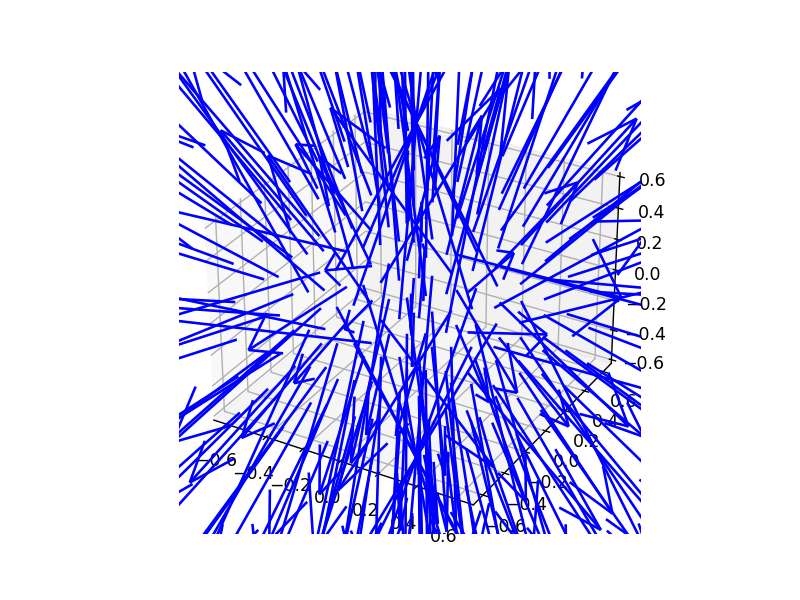

In [57]:
figure = plt.figure()
ax = figure.add_subplot(111)

for i in range(0,len(x)):
    for j in range(0,len(y)):
        for k in range(0,len(z)):
            ax = plt.subplot(111, projection = '3d')
            ax.quiver(x[i], y[j], z[k], Ex[i, j, k],  Ey[i, j, k]   ,  Ez[i, j, k], color = 'b')
